# Mini Project

## 자전거 수요량 예측 데이터 분석  
https://www.kaggle.com/c/bike-sharing-demand



### 1. 가설 설정
데이터 분석 전에 데이터 간의 연관성에 대한 임의의 가설 설정하기

### 2. 데이터 시각화 
4종류 이상의 시각화 기법을 사용하여 그래프 그리기
Seaborn 라이브러리 활용

### 3. 데이터 분석
각 그래프로부터 얻을 수 있는 의미 도출

### 4. 최초의 가설 검정
가설이 유의미한지 여부 판단하기

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 읽어드릴 파일 경로 : /dataset/bike_sharing_demand_train.csv
filepath = "./dataset/bike_sharing_demand_train.csv"
data = pd.read_csv(filepath)

In [9]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


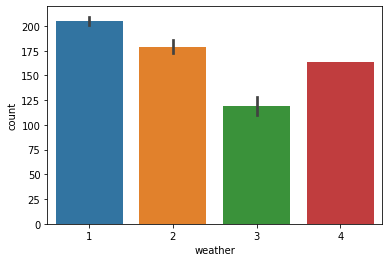

In [69]:
g1 = sns.barplot(data=data, x='weather',y='count')
# 1번 화창한날 대여수가 많고 3번 비바람,여우비가 오는날에 상대적으로 대여수가 적다.

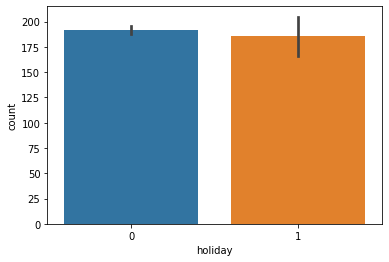

In [68]:
g2 = sns.barplot(data=data, x='holiday', y='count')
# 손님수의 주말 유무의 차이는 크지 않다. 

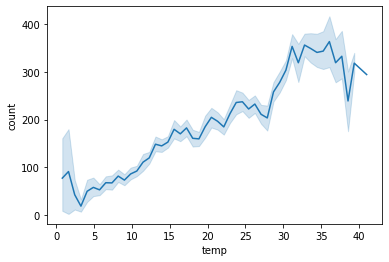

In [67]:
g3 = sns.lineplot(data=data, x='temp', y='count')

In [31]:
# 데이터 타입변경
data['datetime'] = data['datetime'].astype('datetime64')

In [32]:
data.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [34]:
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['minute'] = data['datetime'].dt.minute
data['second'] = data['datetime'].dt.second


In [35]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


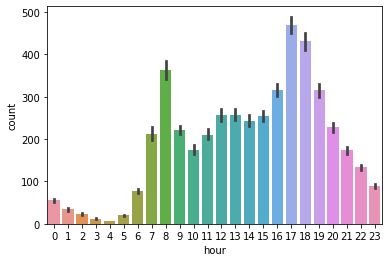

In [81]:
sns.barplot(x='hour', y='count', data= data)
# 출퇴근 시간인 7,8시 타임 / 17시,18시 타임 에 많이 빌린다. >>  

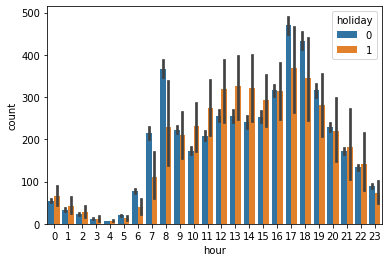

In [80]:
g4  = sns.barplot(x='hour', y='count', data= data, hue = 'holiday')
# 분석결과 오전 오후 저녁으로 나누었을때 오전/저녁에 경우 주중이 , 오후의 경우 주말에 상대적으로 수요가 높음을 알 수 있었다. 

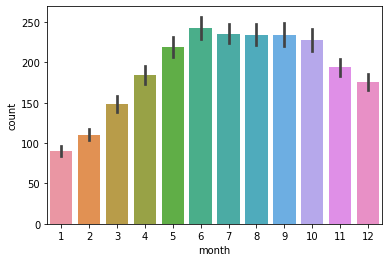

In [58]:
sns.barplot(x='month', y='count', data=data)
# 월별 수요는 1월~ 3월이 저조하고 나머지는 비슷하다. 

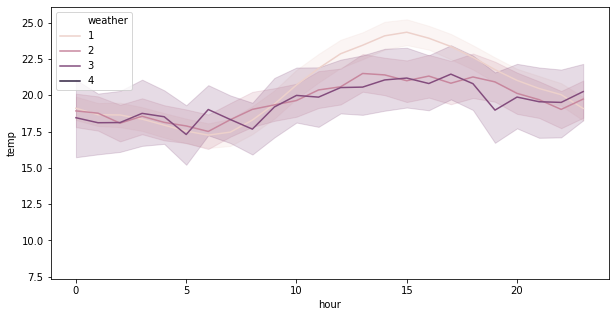

In [78]:
# 계절별 시간대별 온도의 이상치는 없어 보였다. 
plt.figure(figsize=(10,5))
sns.lineplot(x='hour', y='temp', hue = 'weather', data= data) 

In [55]:
# 가설 습도가 높고 기온이 높으면 수요가 적다..? 
data1 = data.pivot('month', 'humidity', 'count')
sns.heatmap(data1)
# 오류가났다.. 

ValueError: Index contains duplicate entries, cannot reshape